# 분석

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 NanumGothic 폰트의 경로 확인
fontpath = 'C:/Windows/Fonts/malgun.ttf'

# 폰트를 Matplotlib에 등록
font = fm.FontProperties(fname=fontpath)
fm.fontManager.addfont(fontpath)

# 한글 폰트를 기본 폰트로 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)  # 마이너스 기호 깨짐 방지

In [24]:
# CSV 파일을 올바른 헤더로 불러오기
# skiprows=1을 사용해서 첫 번째 행을 건너뛰고, 두 번째 행을 헤더로 사용
df1 = pd.read_csv("../data/논벼_경작지당_생산량.csv")
df2 = pd.read_csv("../data/농가수_전체.csv")

In [25]:
# 두 데이터프레임을 지역 기준으로 합치기
merged_df = pd.merge(df1, df2, on='지역', how='inner')

print("합쳐진 데이터 확인:")
print(merged_df.head())
print(f"\n총 데이터 수: {len(merged_df)}")

합쳐진 데이터 확인:
       지역  경작지 당 생산량 [kg/ha]    농가수
0  강원 강릉시              179.4  14787
1  강원 고성군              172.1   4569
2  강원 동해시              172.1   3713
3  강원 삼척시              172.1   7444
4  강원 속초시              171.9   2441

총 데이터 수: 141


In [26]:
# 상관관계 분석
correlation_coef, p_value = pearsonr(merged_df['경작지 당 생산량 [kg/ha]'], merged_df['농가수'])

print(f"\n상관관계 분석 결과:")
print(f"상관계수: {correlation_coef:.4f}")
print(f"p-value: {p_value:.4f}")

# 상관관계 해석
if abs(correlation_coef) >= 0.7:
    strength = "강한"
elif abs(correlation_coef) >= 0.3:
    strength = "중간"
else:
    strength = "약한"

direction = "양의" if correlation_coef > 0 else "음의"
print(f"해석: {direction} {strength} 상관관계")


상관관계 분석 결과:
상관계수: 0.2077
p-value: 0.0135
해석: 양의 약한 상관관계


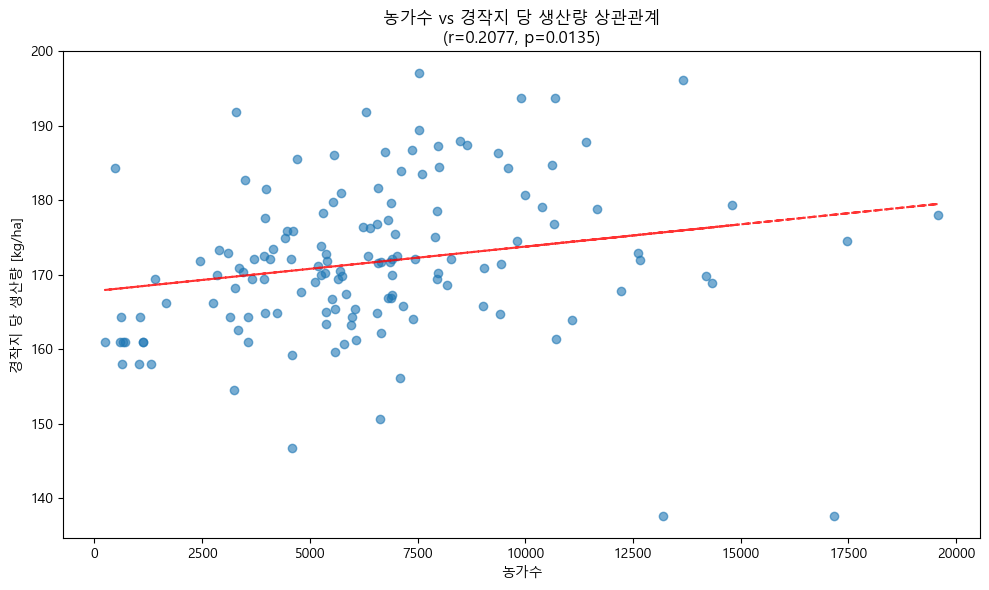


기본 통계 정보:
       경작지 당 생산량 [kg/ha]           농가수
count         141.000000    141.000000
mean          171.673759   6423.858156
std            10.298513   3581.495634
min           137.600000    246.000000
25%           164.900000   3995.000000
50%           171.200000   6048.000000
75%           177.700000   7946.000000
max           197.100000  19586.000000


In [27]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['농가수'], merged_df['경작지 당 생산량 [kg/ha]'], alpha=0.6)
plt.xlabel('농가수')
plt.ylabel('경작지 당 생산량 [kg/ha]')
plt.title(f'농가수 vs 경작지 당 생산량 상관관계\n(r={correlation_coef:.4f}, p={p_value:.4f})')

# 회귀선 추가
z = np.polyfit(merged_df['농가수'], merged_df['경작지 당 생산량 [kg/ha]'], 1)
p = np.poly1d(z)
plt.plot(merged_df['농가수'], p(merged_df['농가수']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# 기본 통계 정보
print(f"\n기본 통계 정보:")
print(merged_df[['경작지 당 생산량 [kg/ha]', '농가수']].describe())